In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Introduction
In this Notebook, we will demonstrate:
- The basic steps to apply the KNN techique for classfication on the cancer dataset
- To show the result or score we get on the classification task
- Bonus: tuning for parameter $k$

### Import the dataset

In [2]:
# This was used in Week6-Example2
cancer_data = pd.read_csv('wdbc.csv')
# Remove unnecessary columns
cancer_data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True);
cancer_data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


### Separate the data into features and target

In [3]:
# Define the independent variables as features.
X = cancer_data.drop('diagnosis', axis=1)
y = cancer_data['diagnosis']

### Create the classifier, using cross validation

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

### Perform the classification

In [5]:
scores = cross_val_score(knn, X, y, cv=10)
print ('Mean score is: {0:2.2f}'.format(scores.mean()))

Mean score is: 0.93


## Bonus
Tuning parameter $k$

In [6]:
# a list of values of k
klist = np.arange(3, 32,2)

In [7]:
k_size = klist.size
k_scores = np.zeros(k_size)

for i,k in enumerate(klist):
    knn = KNeighborsClassifier(n_neighbors=k)
    kscore = cross_val_score(knn, X, y, cv=10)
    k_scores[i] = kscore.mean()
    

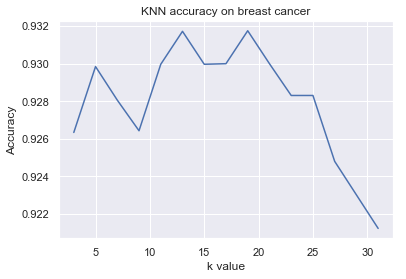

In [8]:
ax = sns.lineplot(klist, k_scores)
ax.set_title('KNN accuracy on breast cancer')
ax.set_xlabel('k value')
ax.set_ylabel('Accuracy');

### Conclusion
A value of $k = 13$ or $k = 19$ seems to offer the best accuracy for the this cancer dataset using KNN. The impact is minimal though, with all values of $k$ between 5 and 20 given accuracies of over 92%